# Problem: Implement Linear Regression from Scratch in Python

## Introduction

Linear Regression is a fundamental algorithm in machine learning used to model the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the best-fitting line that minimizes the error between the predicted values and the actual values.

### Mean Squared Error (MSE)

To evaluate the performance of a linear regression model, we often use **Mean Squared Error (MSE)**. MSE measures the average squared difference between the predicted values and the actual values. It is calculated as follows:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_{\text{true},i})^2
$$

Where:
- `n` is the number of data points.
- `y_pred` is the predicted value.
- `y_true` is the actual value.

The objective of the linear regression algorithm is to minimize the MSE by finding the optimal values for the slope (`m`) and intercept (`b`) of the regression line.


## Feature Normalization

We will also normalize the feature values using the formula:

    X_norm = (X - mean(X)) / std(X)

Where:
- `mean(X)` is the mean of the feature values.
- `std(X)` is the standard deviation of the feature values.

This ensures the features are on a similar scale.

---

## Part 1

Your objective is to implement a **Linear Regression** model from scratch in Python using the following steps:

1. **Calculate MSE**: Write a function to compute the Mean Squared Error between the predicted values and the actual values.
2. **Normalize the Data**: Write a function to normalize the data using the given formula.
3. **Implement this algorithm to fit a line to 2-dimensional dataset**: Hint: Google Gradient Descent
4. **Predict**: Create a method to predict target values based on the fitted model.

You are allowed to use online resources for reference, but you must write the code yourself. You cannot use external libraries that perform linear regression (e.g., `scikit-learn`, `numpy`). Basic Python functions are allowed.


In [10]:
class LinearRegression:
    
    def __init__(self):
        self.m = 0  # Slope of the line
        self.b = 0  # Intercept of the line
    
    def normalize(self, X):
        """
        Normalizes the feature values in X.
        
        Args:
        X (list of floats): The feature values to be normalized.
        
        Returns:
        list of floats: The normalized feature values.
        """

        mean_X = sum(X) / len(X)
        std_X = (sum((x - mean_X) ** 2 for x in X) / len(X)) ** 0.5
        X_normalized = [(x - mean_X) / std_X for x in X]

        return X_normalized
    
    def fit(self, X, y, learning_rate=0.01, num_iterations=1000):
        """
        Finds the slope and y-intercept of the line of best fit.
        
        Args:
        X (list of floats): The feature values.
        y (list of floats): The target values.
        learning_rate (float): The learning rate for gradient descent.
        num_iterations (int): The number of iterations to run gradient descent.
        
        Returns:
        tuple (float, float): The slope (m) and intercept (b) of the fitted line.
        """

        n = len(X)
        for _ in range(num_iterations):
            y_pred = [self.m * x + self.b for x in X]
            # Compute gradients
            dm = (-2 / n) * sum(x * (y_true - y_pred) for x, y_true, y_pred in zip(X, y, y_pred))
            db = (-2 / n) * sum(y_true - y_pred for y_true, y_pred in zip(y, y_pred))
            # Update parameters
            self.m -= learning_rate * dm
            self.b -= learning_rate * db
        

        
        return self.m, self.b
    
    def predict(self, X):
        """
        Predicts the target values given the feature values and the learned model.
        
        Args:
        X (list of floats): The feature values for prediction.
        
        Returns:
        list of floats: The predicted target values.
        """

        predicted_vals = [self.m * x + self.b for x in X]


        return predicted_vals
    
    def mean_squared_error(self, y_true, y_pred):
        """
        Computes the Mean Squared Error between true and predicted target values.
        
        Args:
        y_true (list of float): The actual target values.
        y_pred (list of float): The predicted target values.
        
        Returns:
        float: The Mean Squared Error (MSE).
        """

        mse = sum((y_true - y_pred) ** 2 for y_true, y_pred in zip(y_true, y_pred)) / len(y_true)
        return mse


## Part 2

### Visualizing Linear Regression Results with Matplotlib

In this part, you will fit your `LinearRegression` model to a dataset and visualize the resulting regression line. This exercise will help you see how well your model performs by examining the Mean Squared Error and viewing the regression line in relation to the actual data points.

### Instructions
1. Use the provided dataset to fit your model.
2. Plot the data points alongside the regression line using Matplotlib.
3. Display the Mean Squared Error of your model for reference.

## Dataset Generation
Use this data for the plot (don't modify this)

In [13]:
import numpy as np

def generate_data():
    np.random.seed(42)
    X = np.linspace(1, 50, 100)
    Y = 3 * X + 7 + np.random.normal(0, 10, size=X.shape)
    return X.tolist(), Y.tolist()

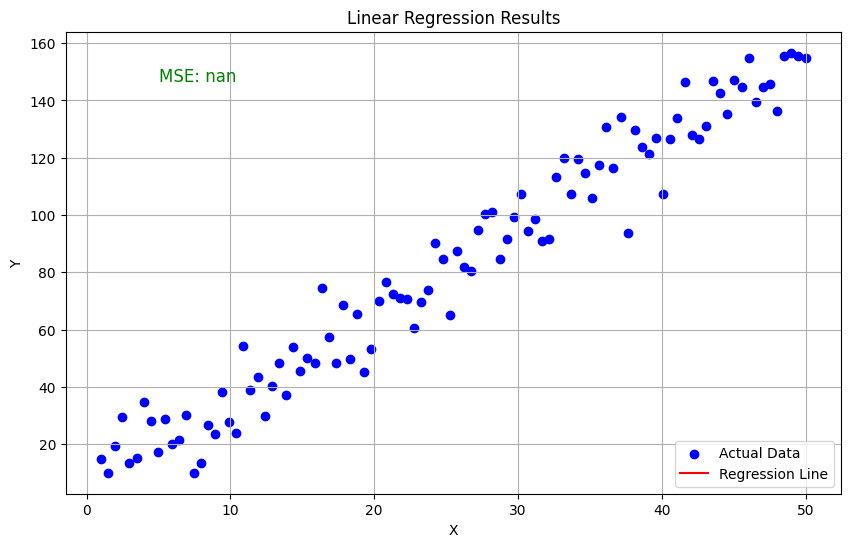

In [14]:
import matplotlib.pyplot as plt

X, Y = generate_data()

# Instantiate the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y, learning_rate=0.01, num_iterations=1000)

# Make predictions
Y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = model.mean_squared_error(Y, Y_pred)

# Plot the data points and regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Display the MSE on the plot
plt.text(5, max(Y) - 10, f'MSE: {mse:.2f}', fontsize=12, color='green')
plt.show()
